<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Lab: Comparing Random Forest and XGBoost modeling performance
Estimated time needed: **20** minutes
    

## Objectives


After completing this lab, you will be able to:

* Use scikit-learn to implement Random Forest and XGBoost regression models
* Compare the performances of the two models 



## Introduction
In this lab, you'll create and measure the relative performances of Random Forest and XGBoost regression models for predicting house prices using the California Housing Dataset.
'Performance' means both speed and accuracy.


First, we need to install the libraries that will be required in this lab.


In [1]:
# Install the Libraries required for the lab.

!pip install numpy==2.2.0
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install xgboost==2.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 121.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 51.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 49.0 MB/s eta 0:00:0000:0100:01


You may now start by importing the required libraries:


In [2]:
# Import the Libraries.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [5]:
# Load the California Housing dataset.

data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Exercise 1: How many observations and features does the dataset have?


In [8]:
# Exercise 1: How many observations and features does the dataset have?

N_observations, N_features = X.shape

print('Number of Observations: ' + str(N_observations))

print('Number of Features: ' + str(N_features))

Number of Observations: 20640
Number of Features: 8


<details><summary>Click here for the solution</summary>

```python

N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))


```

</details>


This is a moderately sized dataset used for this analysis.  
Keep in mind you are only using one dataset so you have to consider that the comparison may change with scale.


### Initialize models
In this step you define the number of base estimators, or individual trees, to be used in each model, and then initialize models for Random Forest regression and XGBoost regression.  You'll just use the default parameters to make the performance comparisons. As a part of the performance comparison, we'll also measure the training times for both models.

In [11]:
# Initialize models
# In this step you define the number of base estimators, or individual trees, to be used in each model, and then initialize models for Random Forest regression and XGBoost regression.

n_estimators = 100
rf = RandomForestRegressor(n_estimators = n_estimators, random_state = 42)
xgb = XGBRegressor(n_estimators = n_estimators, random_state = 42)

In [12]:
# Fit models

# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

### Exercise 2. Use the fitted models to make predictions on the test set. 
Also, measure the time it takes for each model to make its predictions using the time.time() function to measure the times before and after each model prediction.


In [15]:
# Exercise 2: Use the fitted models to make predictions on the test set.
# Also, measure the time it takes for each model to make its predictions using the time.time() function to measure the times before and after each model prediction.

# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

<details><summary>Click here for the solution</summary>

```python
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

```

</details>


### Exercise 3:  Calulate the MSE and R^2 values for both models


In [16]:
# Exercise 3: Calulate the MSE and R^2 values for both models

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

<details><summary>Click here for the solution</summary>

```python
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)
```

</details>


### Exercise 4:  Print the MSE and R^2 values for both models


In [18]:
# Exercise 4: Print the MSE and R^2 values for both models

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2556, R^2 = 0.8050
      XGBoost:  MSE = 0.2226, R^2 = 0.8301


<details><summary>Click here for the solution</summary>

```python

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')
```

</details>


You can see from the MSE and R^2 values that XGBoost is better than Random Forest, but the differences aren't overwhelming.


### Exercise 5:  Print the timings for each model


In [20]:
# Exercise 5: Print the timings for each model.

print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

Random Forest:  Training Time = 18.244 seconds, Testing time = 0.150 seconds
      XGBoost:  Training Time = 0.320 seconds, Testing time = 0.011 seconds


<details><summary>Click here for the solution</summary>

```python
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')
```

</details>


**What is very impressive is the difference in computation time between XGBoost and Random Forest for both training and testing.**

Next, you want to generate scatter plots between the predicted and actual values for both models so you can visually evaluate how well each model performs.
We'll also plot lines, one standard deviation of the test data above and below the ideal line, that is, the line that represents the perfect regressor, where the predictions are all correct.

### Exercise 6. Calculate the standard deviation of the test data


In [23]:
# Exercise 6: Calculate the standard deviation of the test data.

# Standard deviation of y_test
std_y = np.std(y_test)
std_y

np.float64(1.1447309632576992)

<details><summary>Click here for the solution</summary>

``` python
# Standard deviation of y_test
std_y = np.std(y_test)
```

</details>


In [24]:
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

# Calulate the MSE and R^2 values for both models
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

std_y = np.std(y_test)

Random Forest:  MSE = 0.2556, R^2 = 0.8050
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 18.244 seconds, Testing time = 0.199 seconds
      XGBoost:  Training Time = 0.320 seconds, Testing time = 0.011 seconds


### Visualize the results


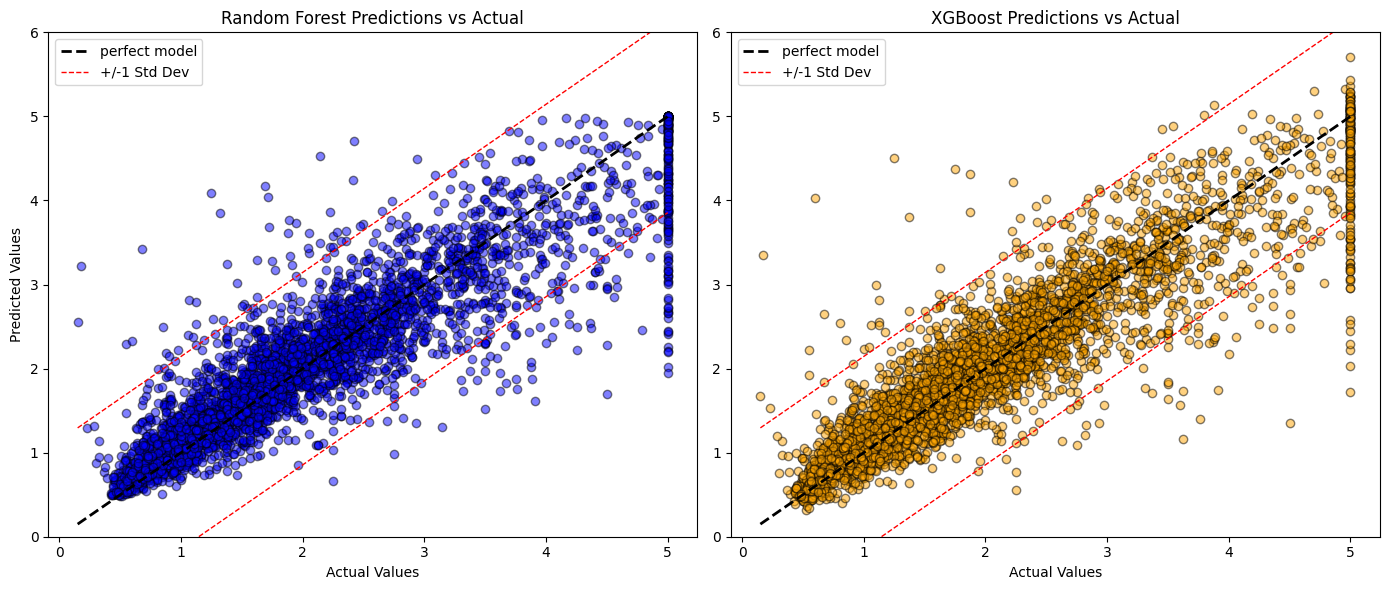

In [25]:
# Visualize the results.

plt.figure(figsize = (14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha = 0.5, color = "blue", ec = 'k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = "perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw = 1, label = "+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw = 1, )
plt.ylim(0, 6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha = 0.5, color = "orange", ec = 'k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = "perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw = 1, label = "+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw = 1, )
plt.ylim(0, 6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()

# Display the plot.
plt.show()

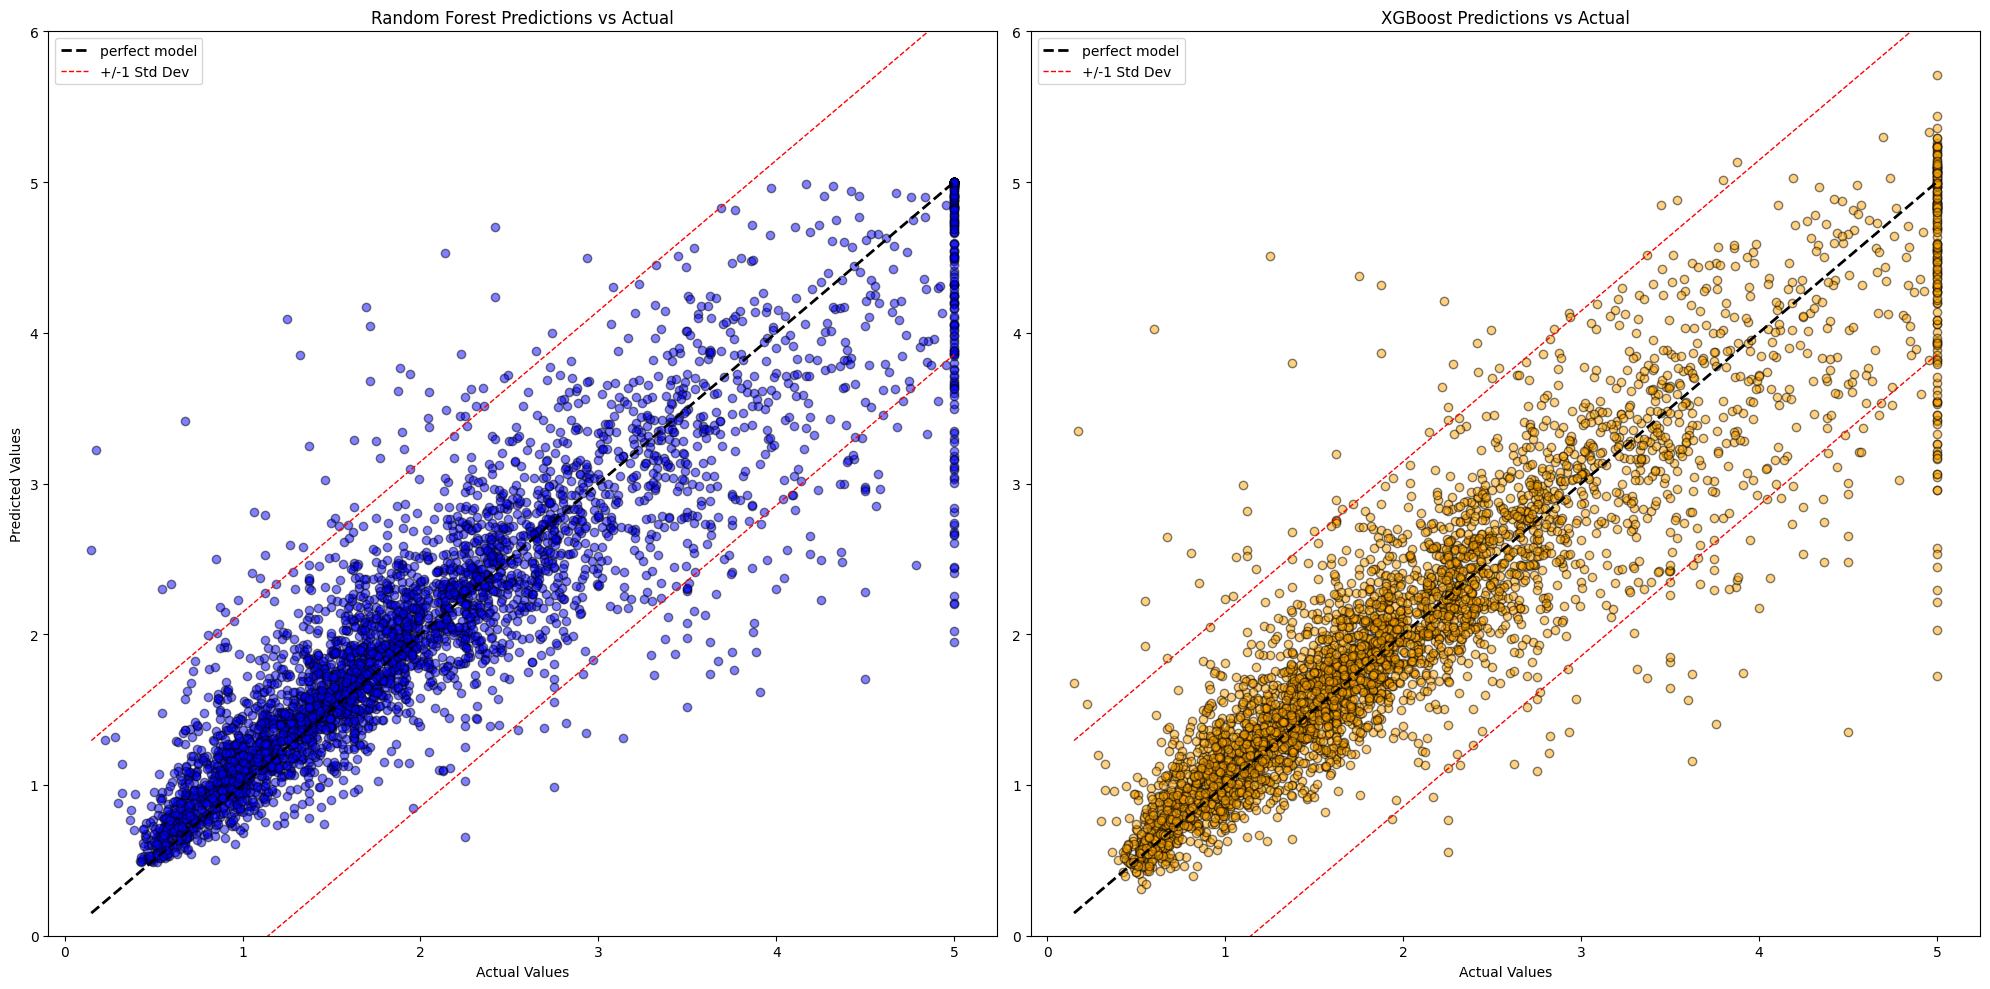

In [26]:
# Visualize the results.

plt.figure(figsize = (20, 10))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha = 0.5, color = "blue", ec = 'k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = "perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw = 1, label = "+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw = 1, )
plt.ylim(0, 6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha = 0.5, color = "orange", ec = 'k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = "perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw = 1, label = "+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw = 1, )
plt.ylim(0, 6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()

# Display the plot.
plt.show()

Both models performed very well. Most of their predictions fall within a standard deviation of the target. Interestingly, random forest "respects" the upper bound (the maximum value) present in the target by staying within its limits, while XGBoost "overshoots", or exceeds this limit. 


### Congratulations! You're ready to move on to your next lesson.

## Author

<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>

### Other Contributors

<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abhishek Gagneja</a>

<!-- ## Changelog

| Date | Version | Changed by | Change Description |
|:------------|:------|:------------------|:---------------------------------------|
| 2024-11-05 | 1.0  | Jeff Grossman    | Create content | -->



## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
